In [17]:
!pip install ultralytics

In [18]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.69 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [19]:

from ultralytics import YOLO
from IPython.display import Image

In [20]:
!pip install roboflow

In [21]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gJNHinVF0reJgt8UAzu4")
project = rf.workspace("sowmikroy").project("pin-detection-lg9ld")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pin-detection--1 in yolov5pytorch:: 100%|██████████| 48/48 [00:00<00:00, 2998.65it/s]


In [22]:
dataset.location

'/content/pin-detection--1'

In [23]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=60 imgsz=640

Ultralytics 8.3.69 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/pin-detection--1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

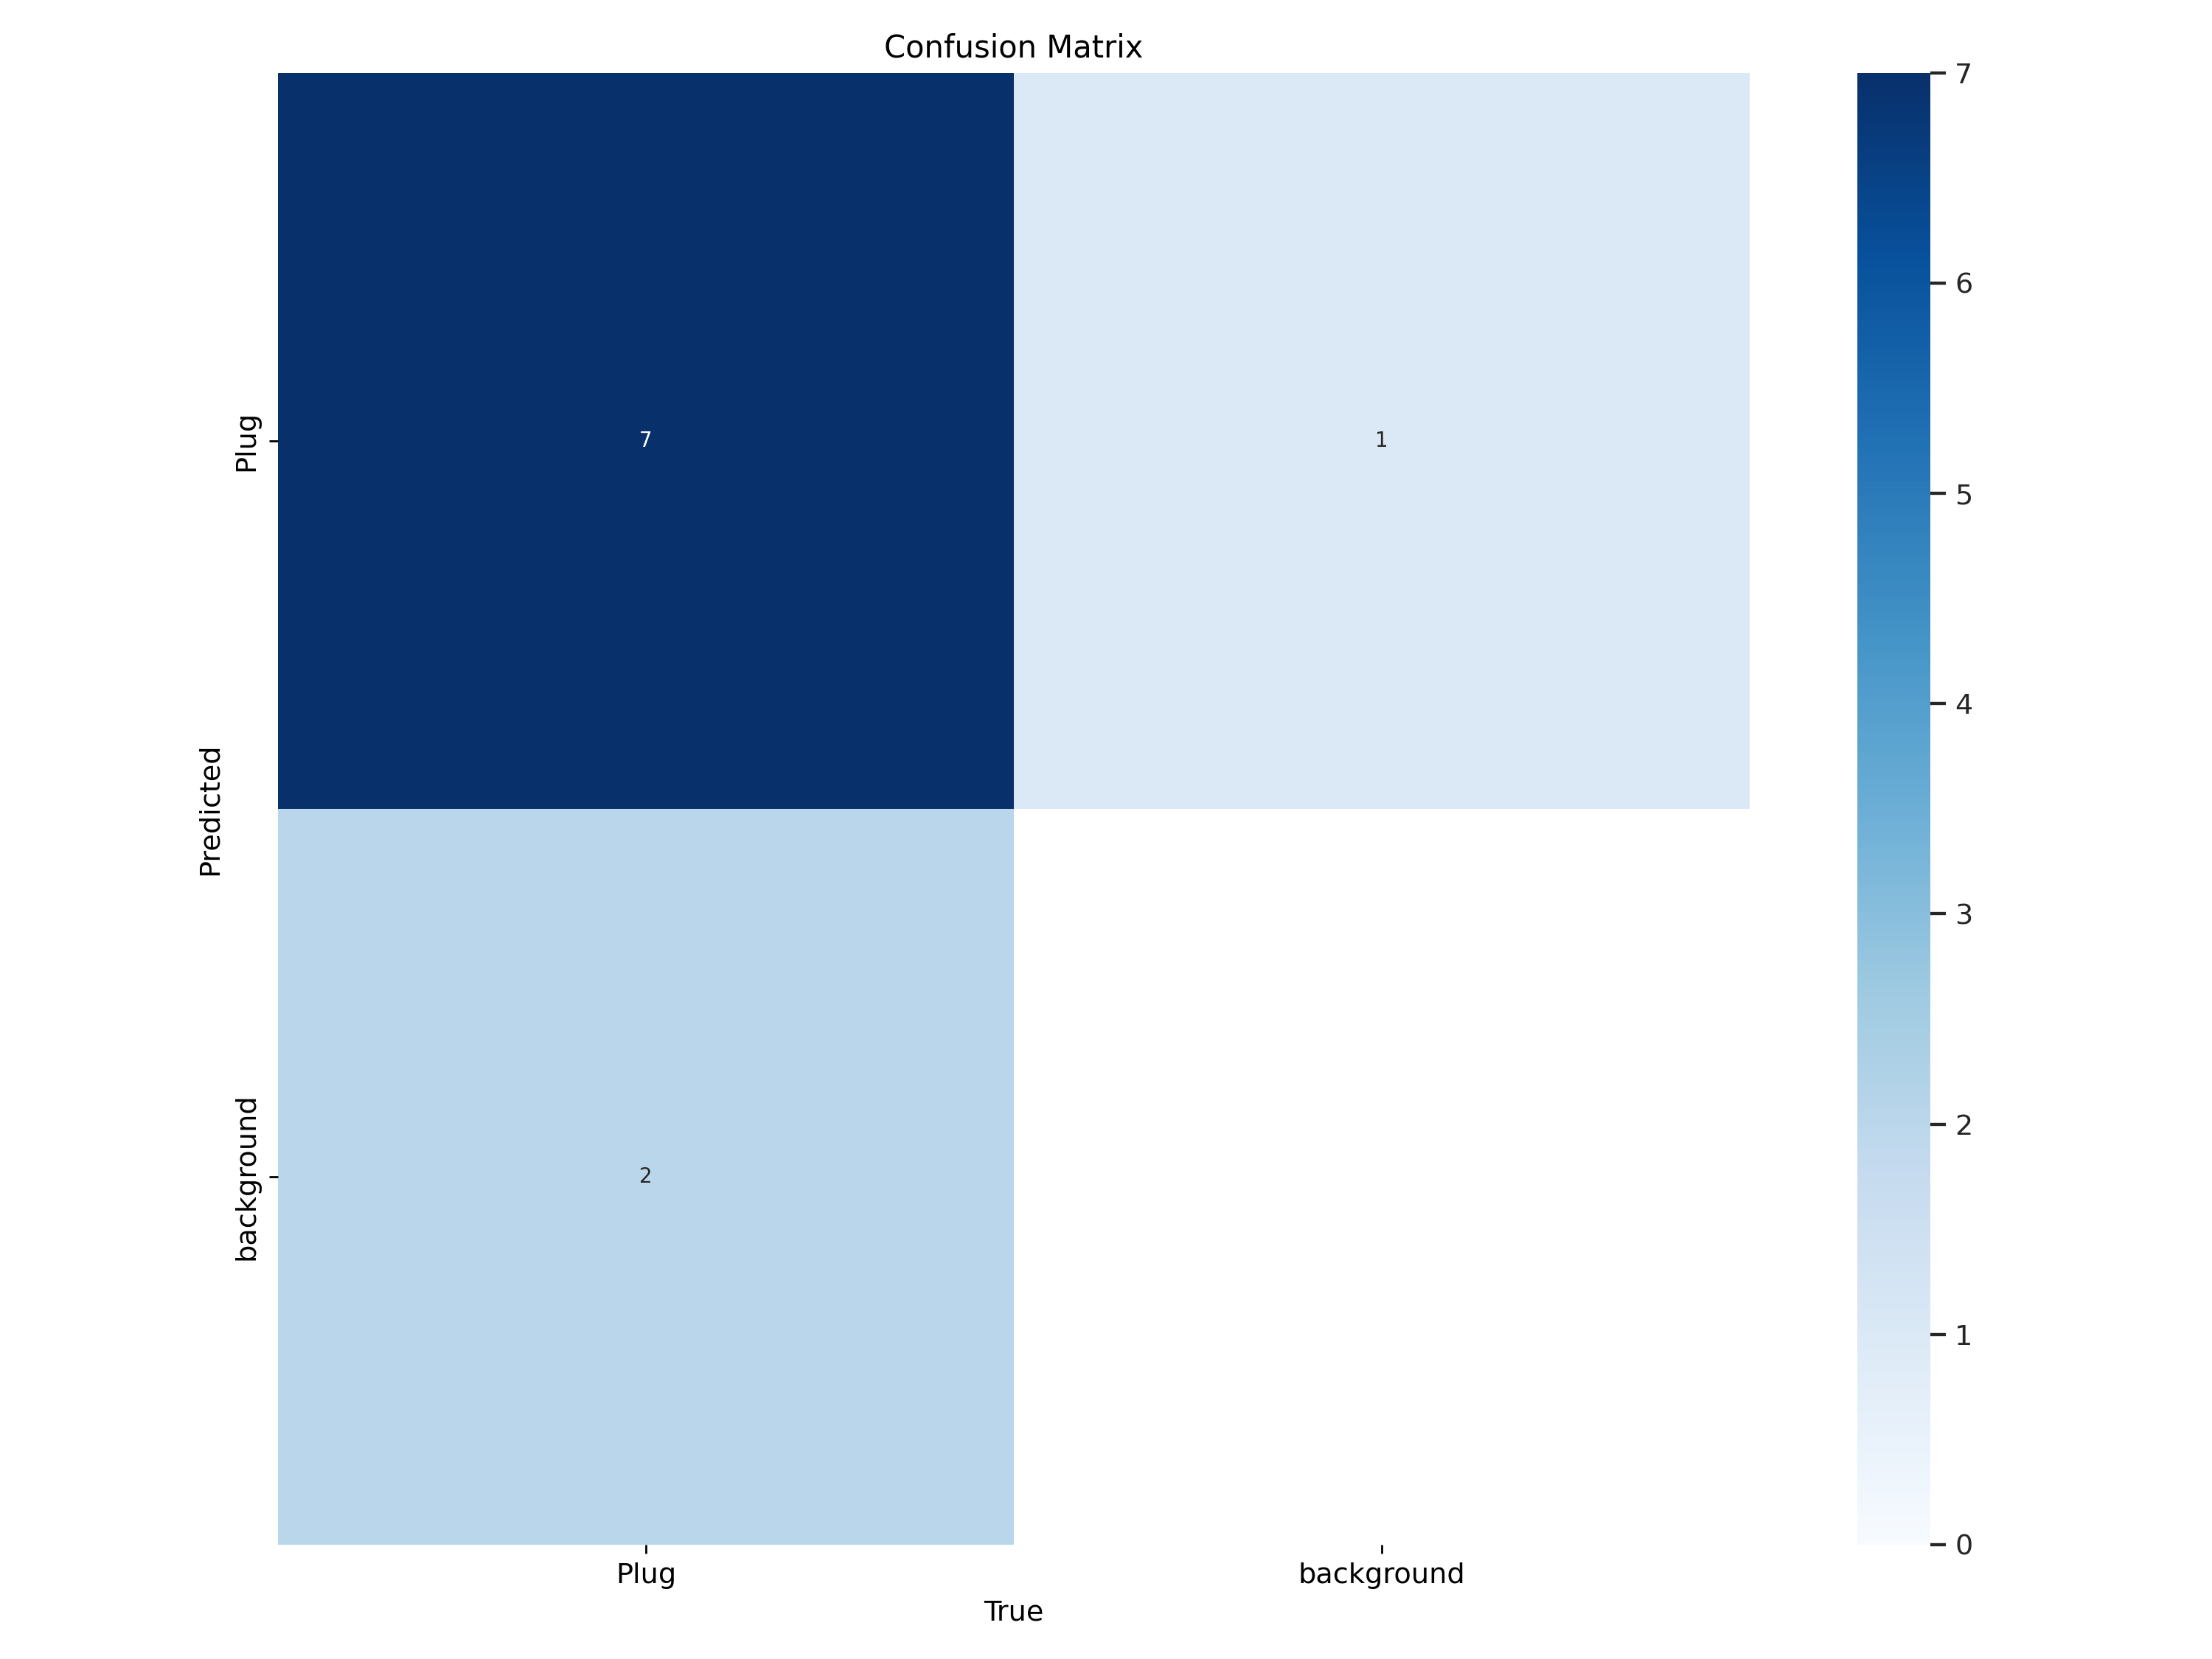

In [24]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)



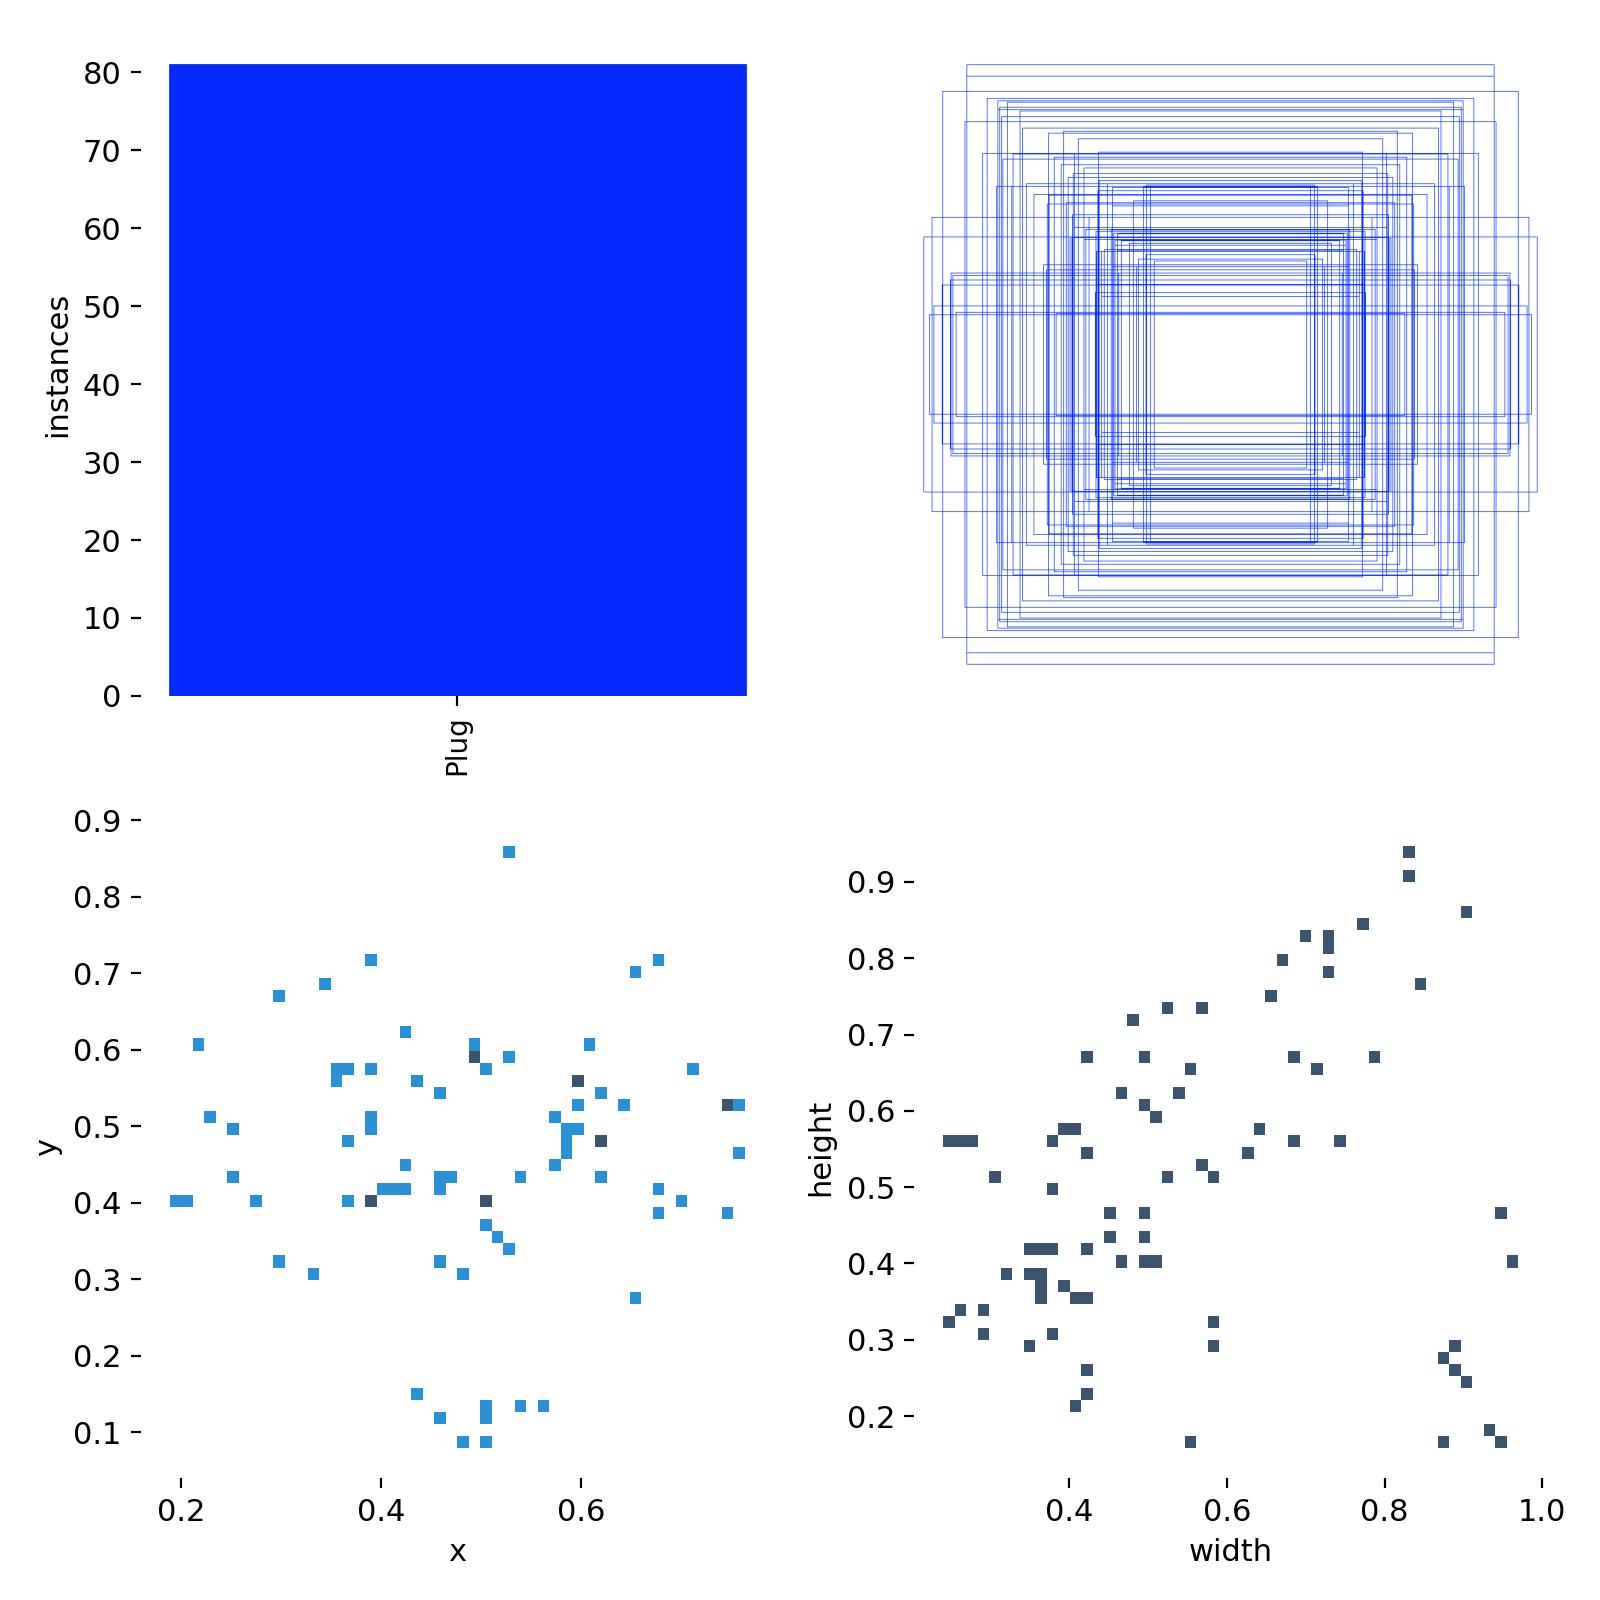

In [25]:
Image("/content/runs/detect/train/labels.jpg", width=600)

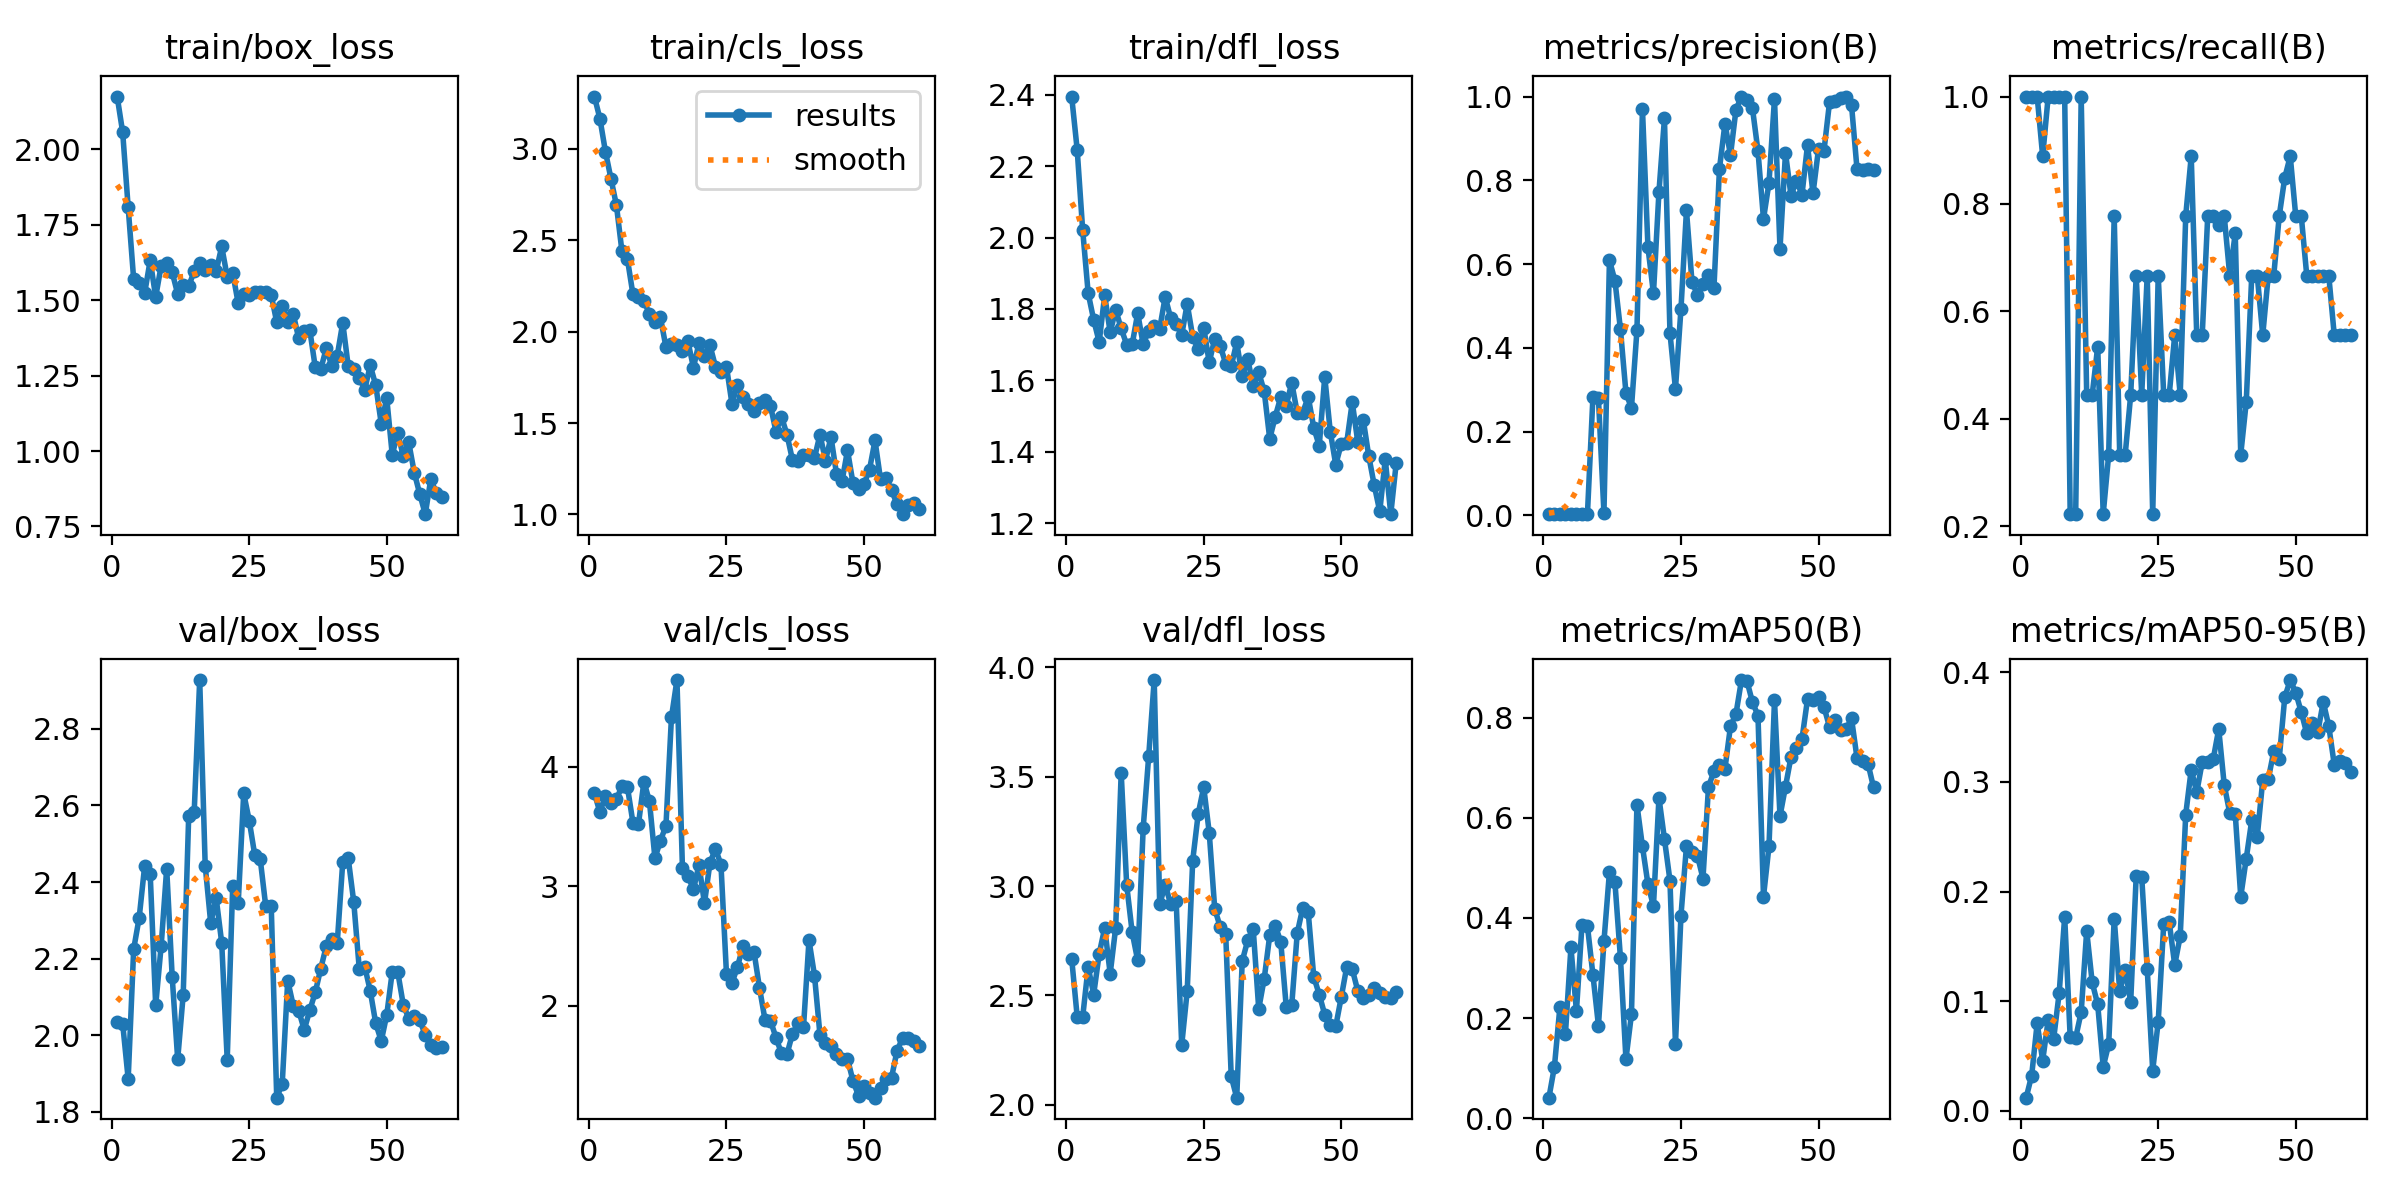

In [26]:
Image("/content/runs/detect/train/results.png", width=600)

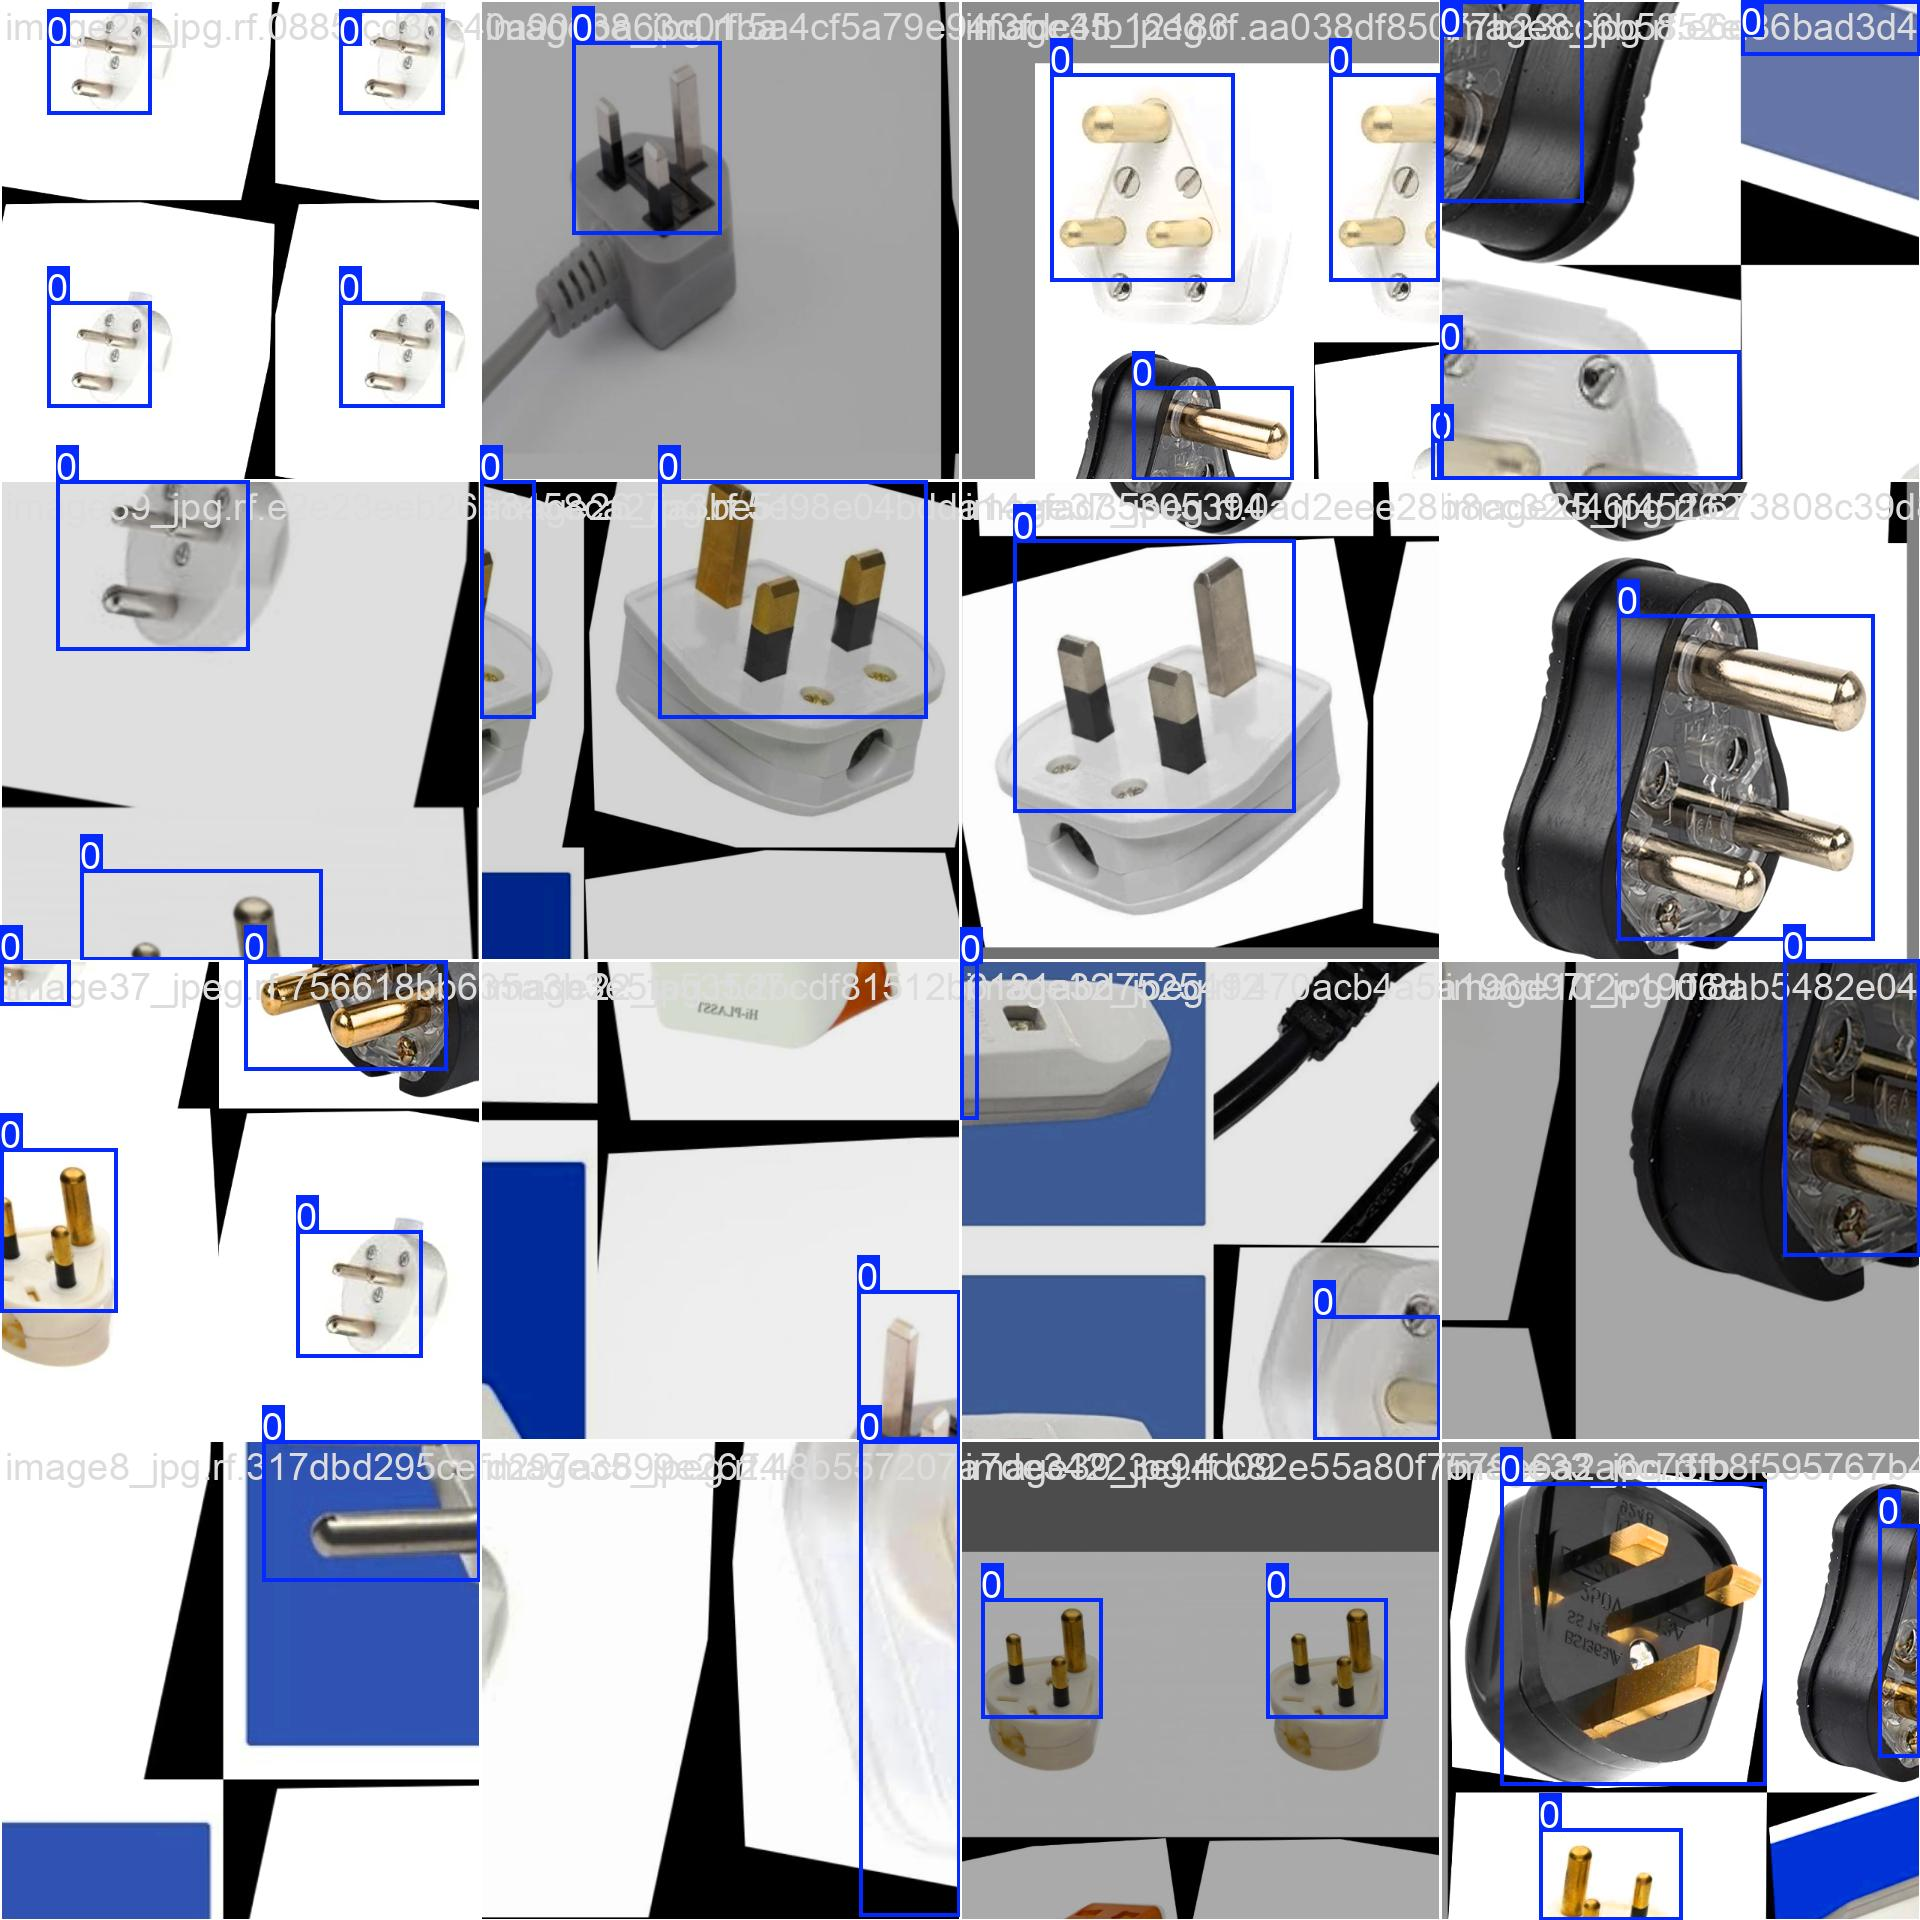

In [27]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

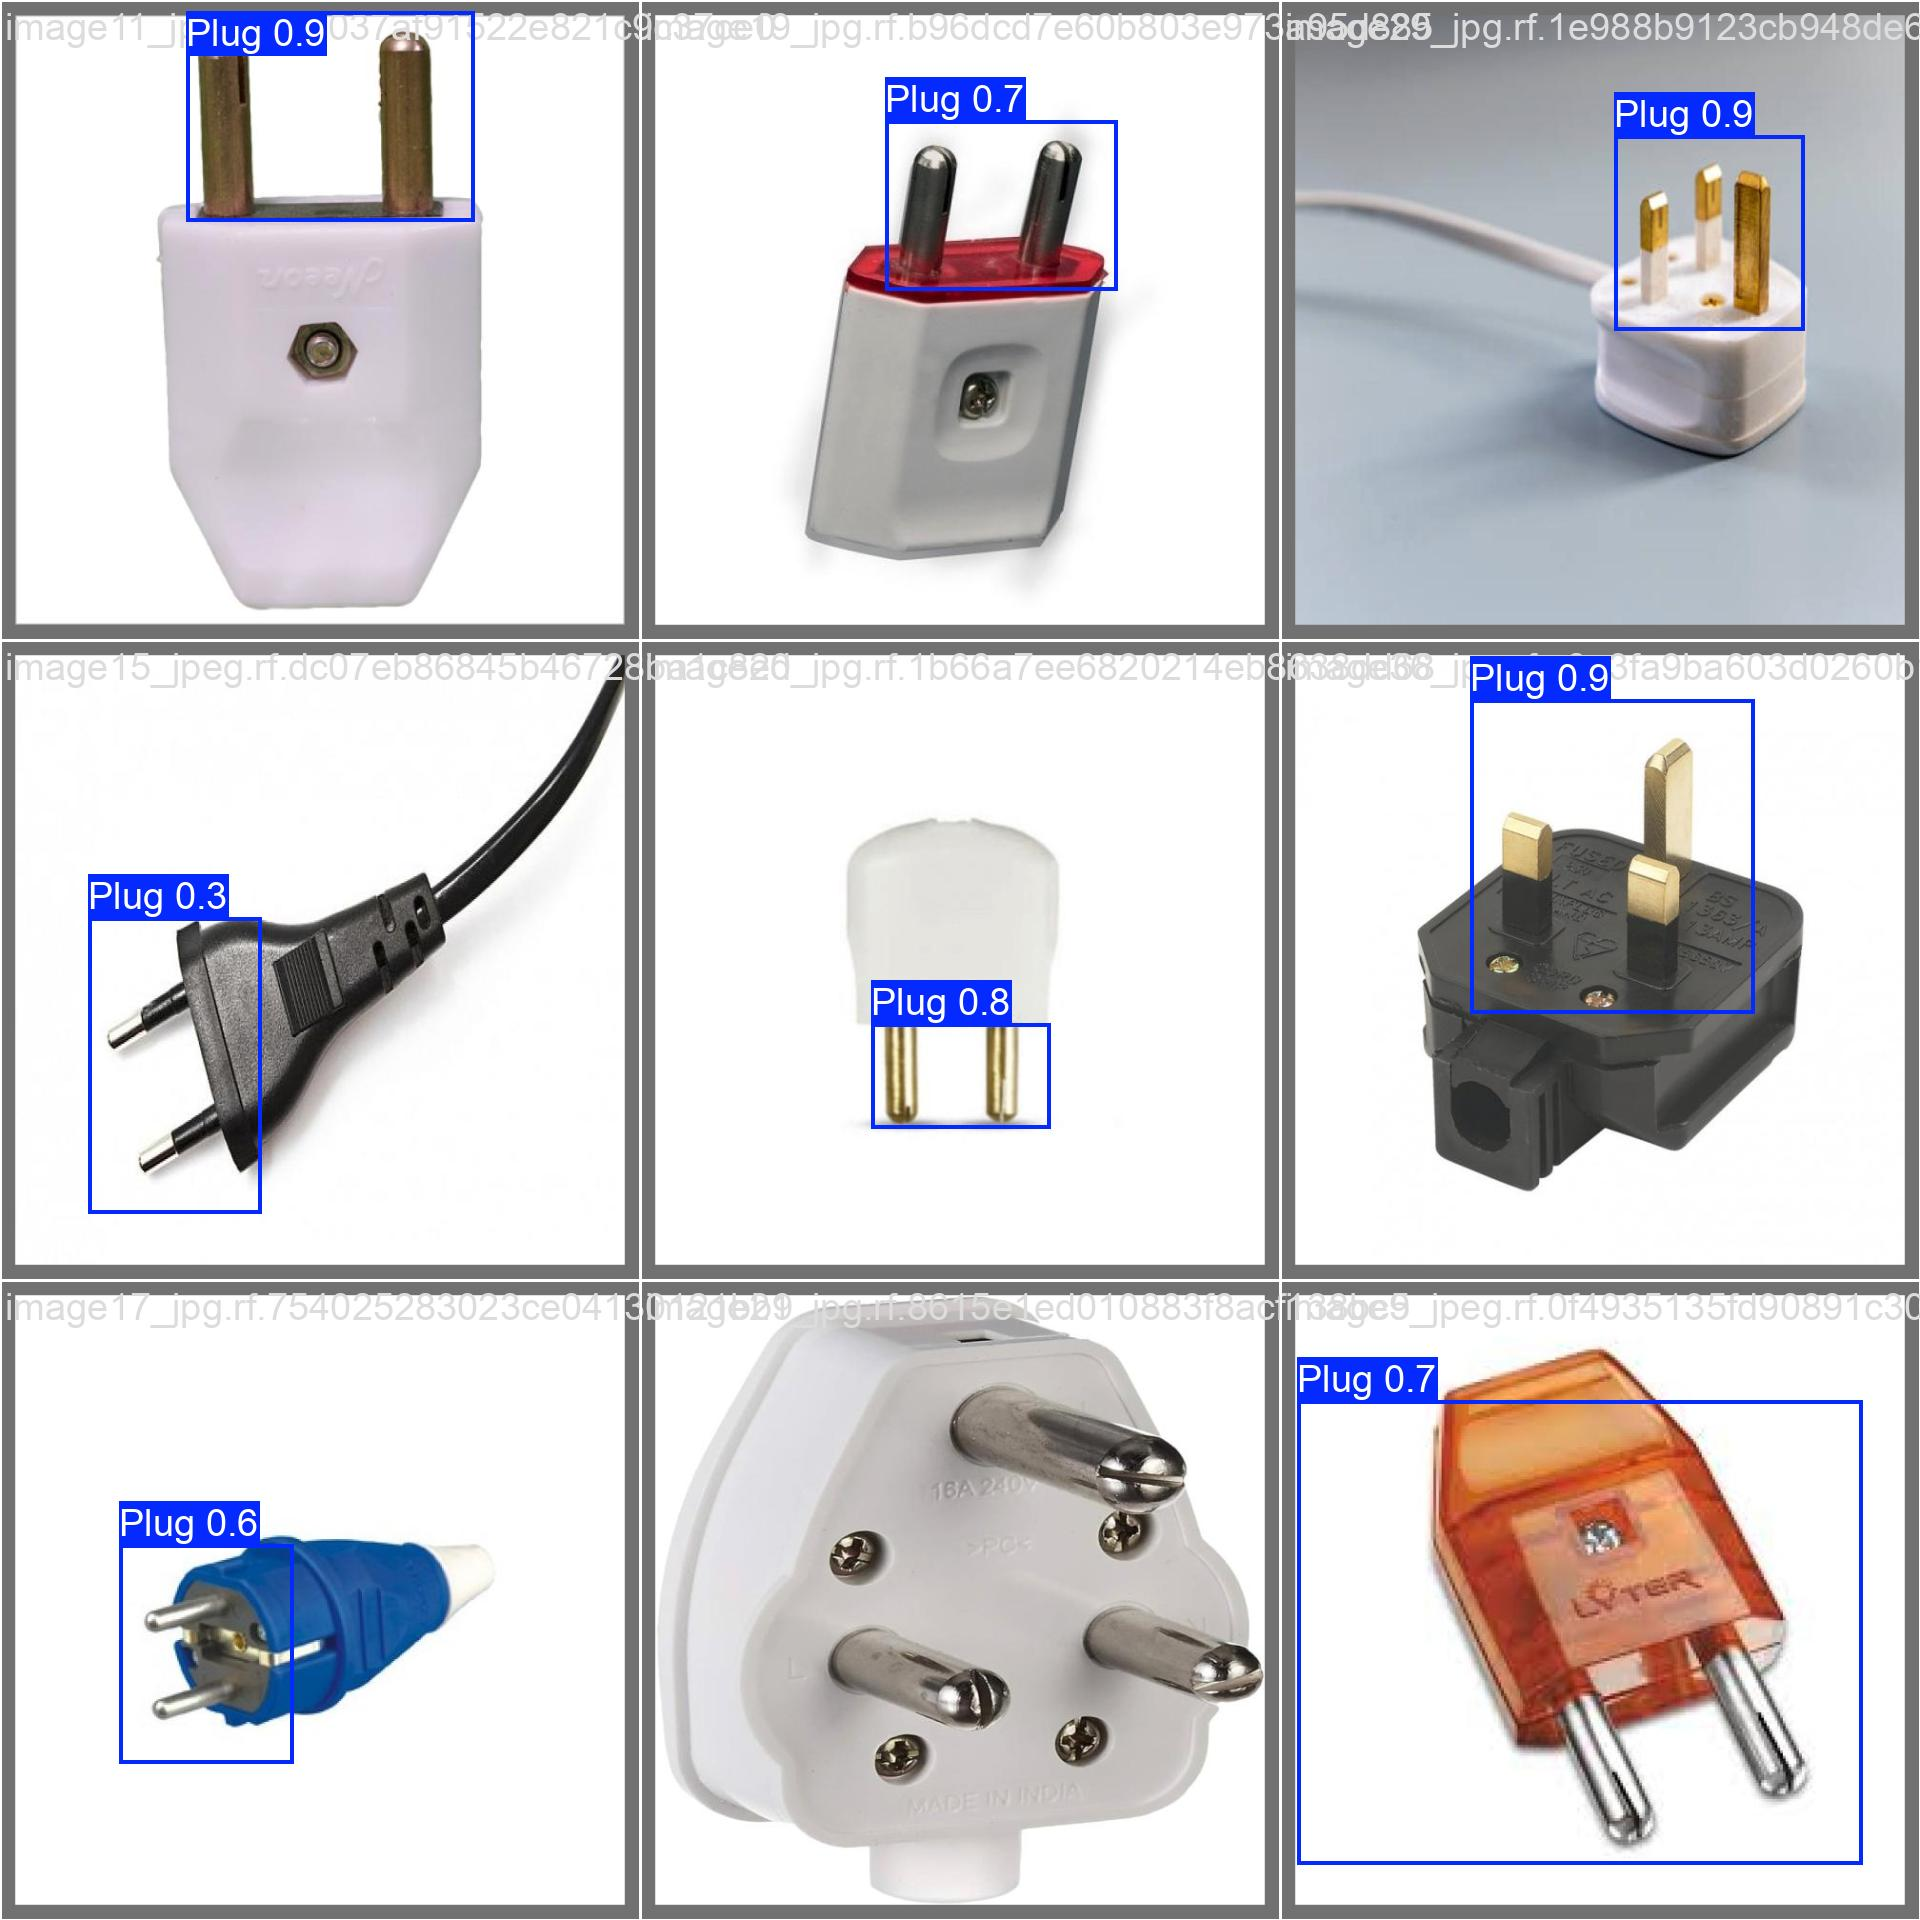

In [28]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

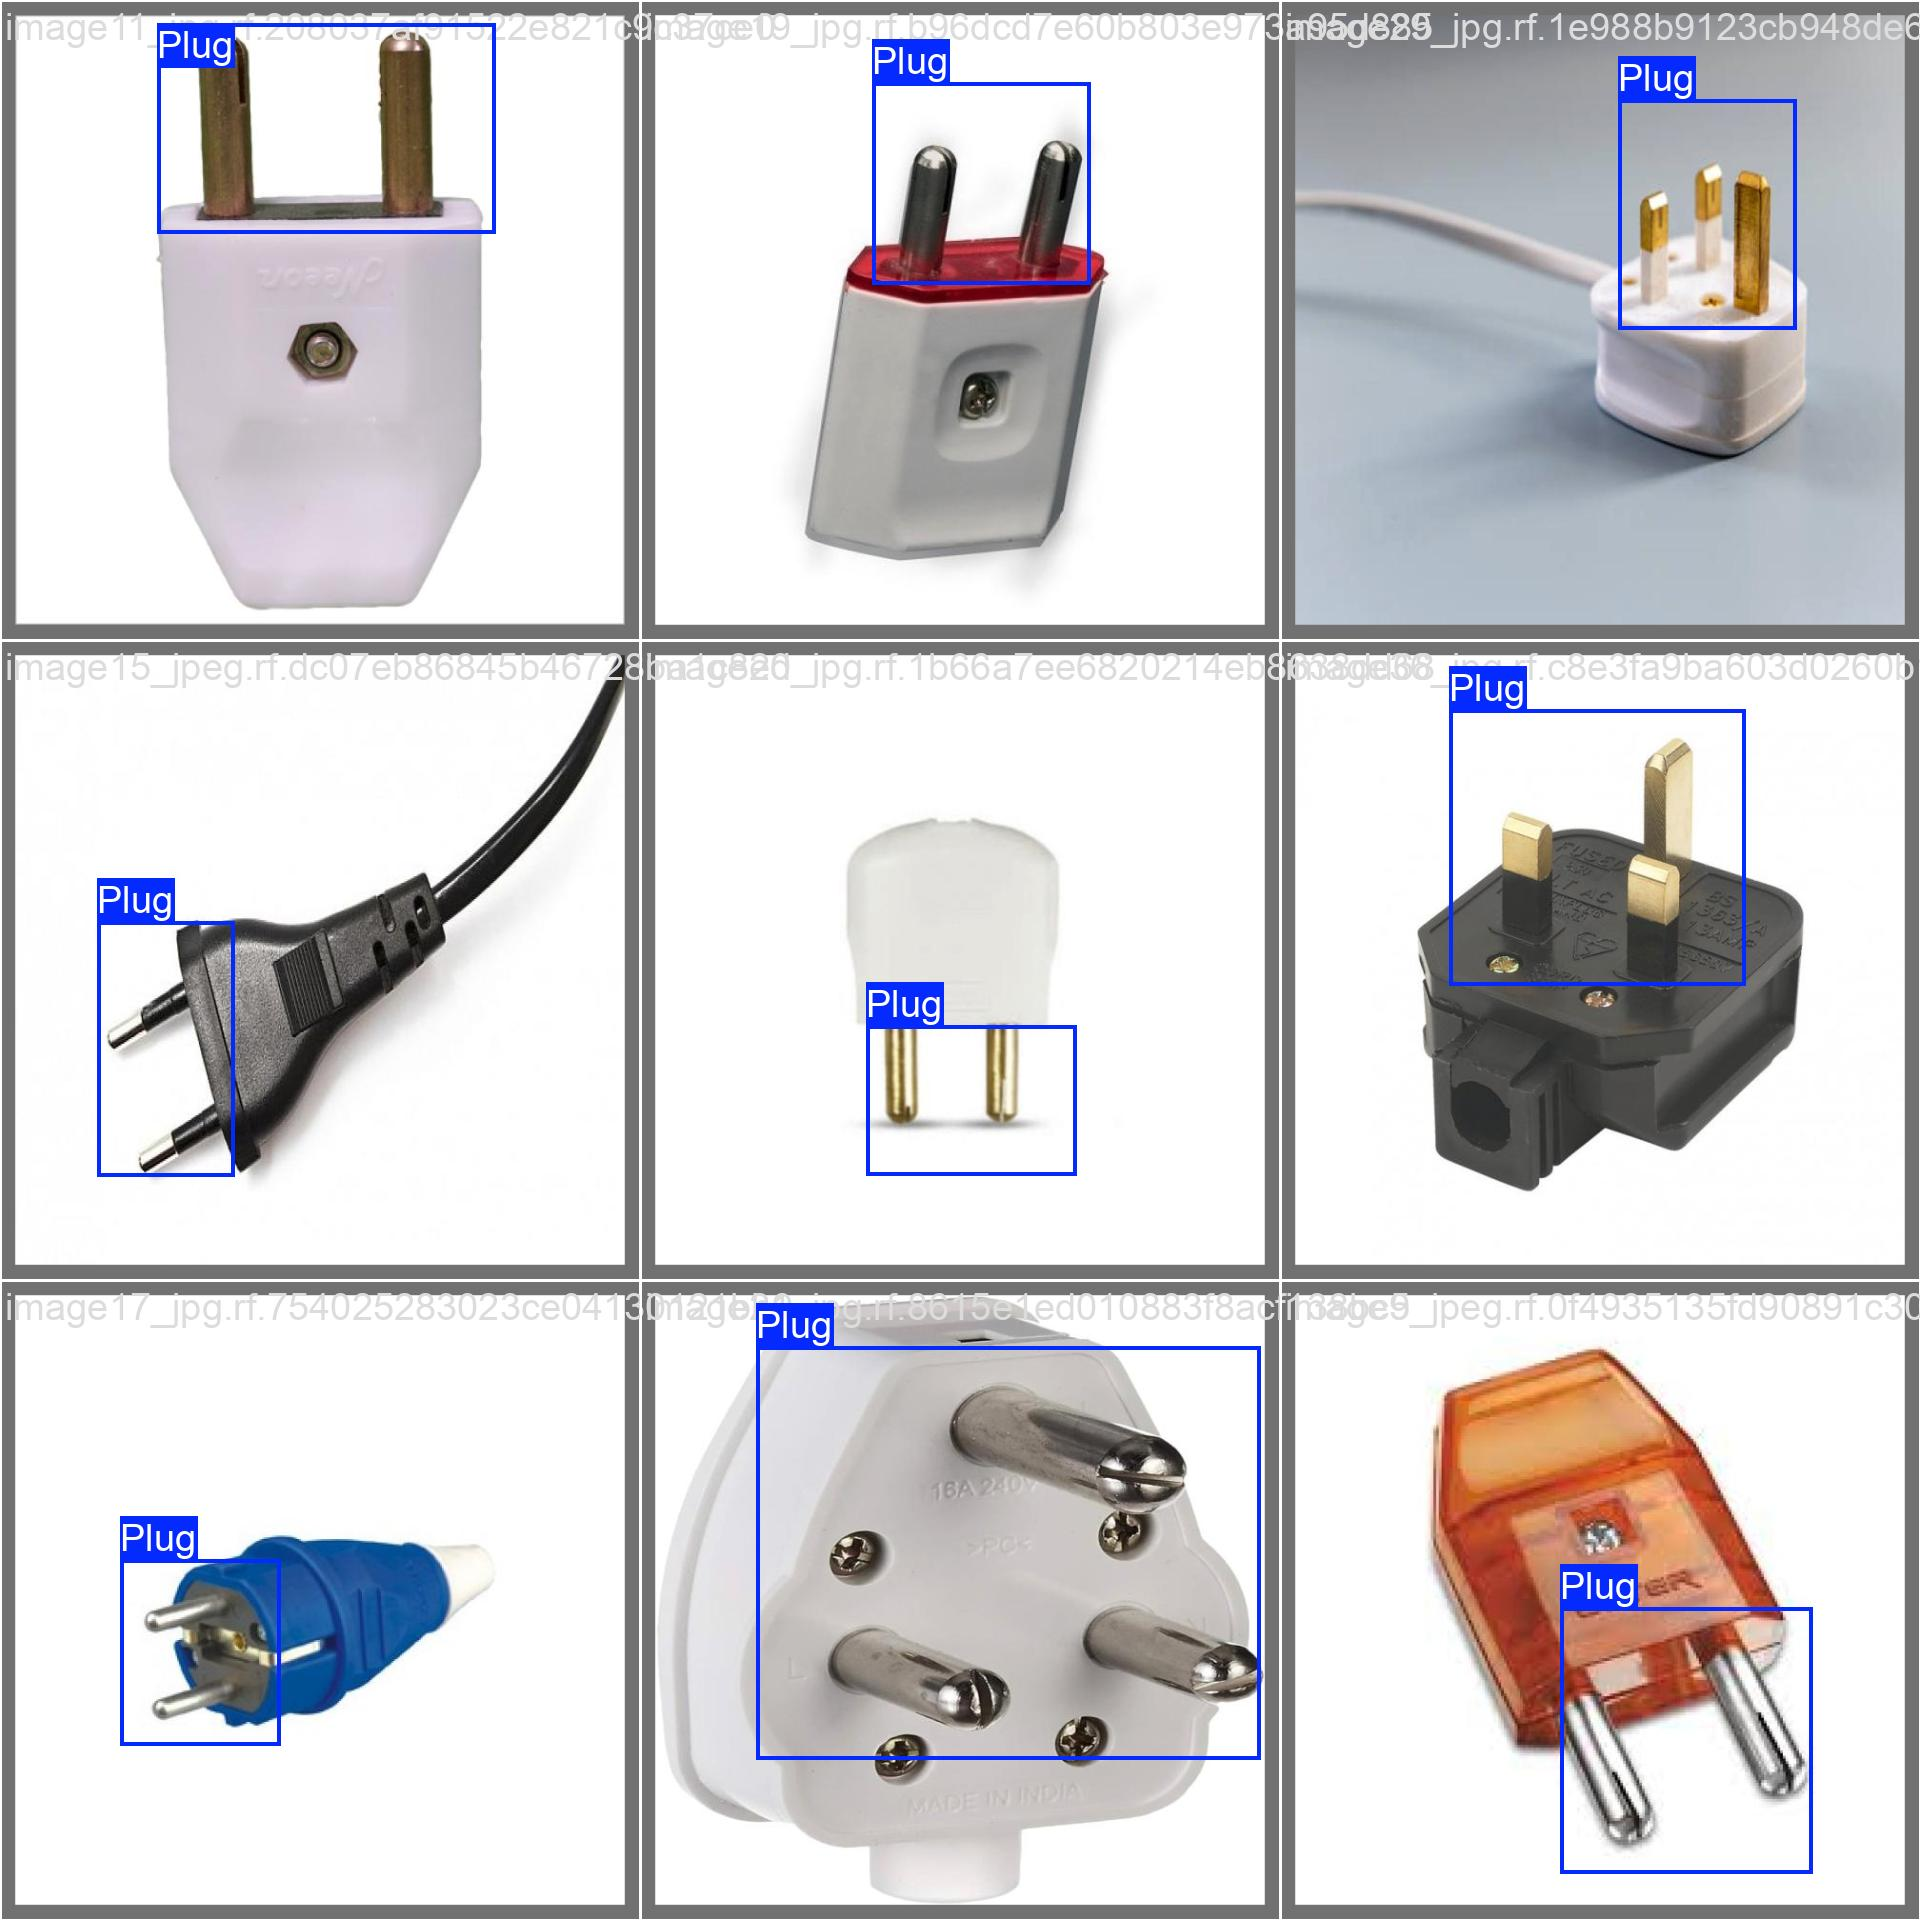

In [29]:
Image("/content/runs/detect/train/val_batch0_labels.jpg", width=600)

In [30]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.69 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 986, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 639, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 147, in __call__
    self.data = check_det_dataset(self.args.data)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/utils.py", line 376, in check_det_dataset
    raise FileNotFoundError(

In [31]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.69 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/2 /content/pin-detection--1/test/images/photo_1_2025-01-30_03-03-23_jpg.rf.81ad4a2ea7d356d1efcd3a9e236bb902.jpg: 640x640 1 Plug, 23.6ms
image 2/2 /content/pin-detection--1/test/images/photo_3_2025-01-30_03-03-23_jpg.rf.132a78c3963b7fa6d1a3c548e059eaa1.jpg: 640x640 (no detections), 17.7ms
Speed: 7.4ms preprocess, 20.6ms inference, 166.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


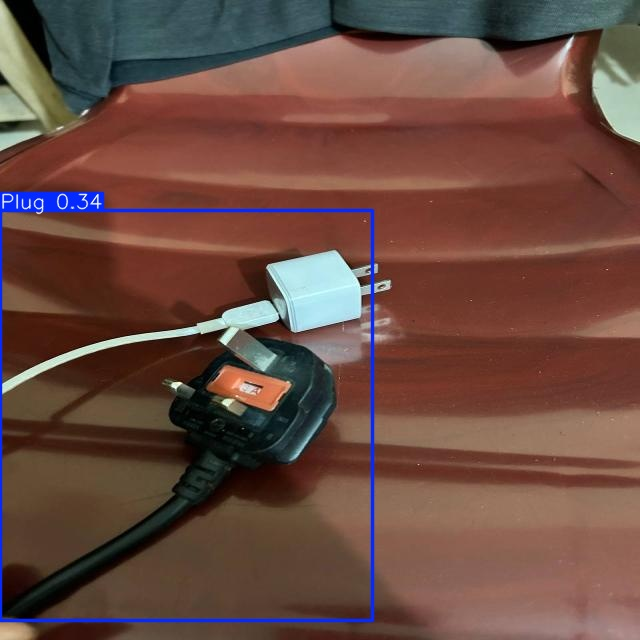

In [32]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")